In [1]:
#setup 
import numpy as np
import pandas as pd 
from tkinter import filedialog
import matplotlib.pyplot as plt
import os 
import glob
import csv
import itertools

In [2]:
#Dialog box 
initialdir='/Desktop/UROP/' #assign a directory 
filepaths= filedialog.askopenfilename(multiple=True, initialdir=initialdir,title='Select a File', filetypes=(("ASC Files",".ASC"),))
#^opens dialogbox to select multiple files that end in .ASC
print(filepaths)

('/home/jasonk0401/Desktop/UpdatedProject/ALZ3UM.ASC', '/home/jasonk0401/Desktop/UpdatedProject/GAZ3UM.ASC')


In [3]:
#for root, dirs, files in os.walk(initialdir):
    #for names in files:
       #print(names)

In [4]:
#return filenames instead of full filepath
# list_files(filepath, filetype):
  #paths = []
   #for root, dirs, files in os.walk(filepath):
      #for name in files:
         #if name.lower().endswith(nametype.lower()):
            #paths.append(os.path.join(root, name))
   #return(paths)

In [5]:
#def list_files(filepath, filetype):
    #paths=[]
    #for root, dirs, files in os.walk(filepath):
        #for name in files:
            #if name.lower().endswith(filetype.lower()):
                #paths.append(name)
    #return(paths)

In [6]:
#filenames= list_files(initialdir, '.asc')
#print(filenames)

In [7]:
#shorten filepaths to just filenames 
filenames = []
for path in filepaths:
    name = path[40:].strip() 
    name2 = name[:].strip() 
    filenames.append(name2)
print(filenames)

['ALZ3UM.ASC', 'GAZ3UM.ASC']


In [8]:
#Compliling Files Into List of Lists
df=pd.DataFrame()
for element in filenames:
    df2=pd.read_csv(element, usecols=['Wavelength','Intensity'])
    df=pd.concat([df,df2], axis=1)
print(df)

     Wavelength  Intensity  Wavelength  Intensity
0     531.77081   393210.0   531.77081   393210.0
1     531.84149   393210.0   531.84149   393210.0
2     531.91216   243432.0   531.91216   197919.0
3     531.98284    26123.0   531.98284    22679.0
4     532.05351    10128.0   532.05351    10607.0
..          ...        ...         ...        ...
571   571.76997     3334.0   571.76997     1052.0
572   571.83939     3487.0   571.83939     1002.0
573   571.90881     3442.0   571.90881     1058.0
574   571.97823     3416.0   571.97823     1118.0
575   572.04764     3723.0   572.04764     1317.0

[576 rows x 4 columns]


In [9]:
cols = []
count = 1
for column in df.columns:
    if column=='Wavelength':
        cols.append(f'Wavelength_{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols
cols = []
count = 1
for column in df.columns:
    if column=='Intensity':
        cols.append(f'Intensity_{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols
print(df)

     Wavelength_1  Intensity_1  Wavelength_2  Intensity_2
0       531.77081     393210.0     531.77081     393210.0
1       531.84149     393210.0     531.84149     393210.0
2       531.91216     243432.0     531.91216     197919.0
3       531.98284      26123.0     531.98284      22679.0
4       532.05351      10128.0     532.05351      10607.0
..            ...          ...           ...          ...
571     571.76997       3334.0     571.76997       1052.0
572     571.83939       3487.0     571.83939       1002.0
573     571.90881       3442.0     571.90881       1058.0
574     571.97823       3416.0     571.97823       1118.0
575     572.04764       3723.0     572.04764       1317.0

[576 rows x 4 columns]


Text(0, 0.5, 'Non-Normalized Intensity(a.u.)')

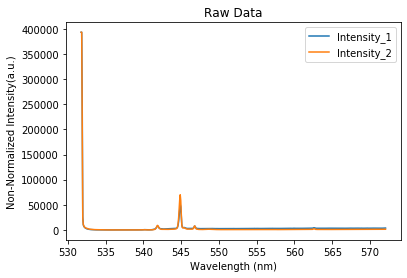

In [10]:
#Plotting Raw Data
test='Intensity'
IntCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#print(IntCols)
df.plot(x='Wavelength_1', y=IntCols)
plt.title('Raw Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Non-Normalized Intensity(a.u.)')

In [11]:
#Skip first 300 rows to get rid of rayleigh line
df=df.drop(df.index[0:50])
#leaves rows as 250-575
#reset index becasuse it causes problems later when concating 
df.reset_index(drop=True, inplace=True)
print(df)

     Wavelength_1  Intensity_1  Wavelength_2  Intensity_2
0       535.30197          4.0     535.30197          0.0
1       535.37254          0.0     535.37254          0.0
2       535.44310          0.0     535.44310          3.0
3       535.51367          0.0     535.51367         19.0
4       535.58423          0.0     535.58423          0.0
..            ...          ...           ...          ...
521     571.76997       3334.0     571.76997       1052.0
522     571.83939       3487.0     571.83939       1002.0
523     571.90881       3442.0     571.90881       1058.0
524     571.97823       3416.0     571.97823       1118.0
525     572.04764       3723.0     572.04764       1317.0

[526 rows x 4 columns]


Text(0, 0.5, 'Non-Normalized Intensity(a.u.)')

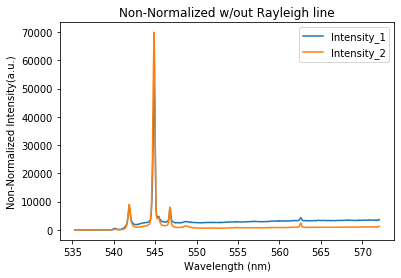

In [12]:
#Plotting Non-Normalized w/out Rayleigh line n Wavelength (nm)
test='Intensity'
IntCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#print(IntCols)
df.plot(x='Wavelength_1', y=IntCols)
plt.title('Non-Normalized w/out Rayleigh line')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Non-Normalized Intensity(a.u.)')

In [13]:
#Wavelength (nm) and Normalized Intensity 
#create list of columns that start with Intensity
test='Intensity'
IntCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#for columns in df if they start with Intensity 
#apply calculation to columns that start with Intensity 
for col in df:
    if col.startswith(test):
        df[IntCols] = (df[IntCols].apply(lambda x: x/x.max())) #divide each number in a column by the max of that column
print(df)

     Wavelength_1  Intensity_1  Wavelength_2  Intensity_2
0       535.30197     0.000079     535.30197     0.000000
1       535.37254     0.000000     535.37254     0.000000
2       535.44310     0.000000     535.44310     0.000043
3       535.51367     0.000000     535.51367     0.000272
4       535.58423     0.000000     535.58423     0.000000
..            ...          ...           ...          ...
521     571.76997     0.065654     571.76997     0.015049
522     571.83939     0.068667     571.83939     0.014333
523     571.90881     0.067781     571.90881     0.015134
524     571.97823     0.067269     571.97823     0.015993
525     572.04764     0.073315     572.04764     0.018839

[526 rows x 4 columns]


Text(0, 0.5, 'Normalized Intensity(a.u.)')

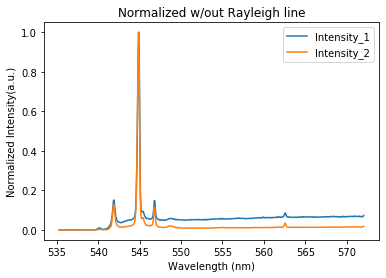

In [14]:
#Plotting Normalized w/out Rayleigh line in Wavelength (nm)
#probably dont need this everytime since IntCols is defined above
test='Intensity'
IntCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#print(IntCols)
df.plot(x='Wavelength_1', y=IntCols)
plt.title('Normalized w/out Rayleigh line')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Intensity(a.u.)')

In [15]:
#Wavenumber cm^-1 and Normalized Intensity 
#Excitation_Wavelength=531
#a=10**7/Excitation_Wavelength
#test='Wavelength'
#WavCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#print(WavCols)
#list of Wavelength column names
#for cols in df:
    #new_df = df.apply(lambda x: -10**7/x + a if x.name in [WavCols] else x)
#print(new_df)                 

In [17]:
#Wavenumber cm^-1 and Normalized Intensity 
#setup numbers for conversion 
test="Wavelength"
Excitation_Wavelength=532
a=10**7/Excitation_Wavelength
#for columns in df if they start with Intensity 
#apply calculation to columns that start with Intensity 
for col in df:
    if col.startswith(test):
        df[col]= (df[col].apply(lambda x:-10**7/x + a))
print(df)

     Wavelength_1  Intensity_1  Wavelength_2  Intensity_2
0      115.947836     0.000079    115.947836     0.000000
1      118.410274     0.000000    118.410274     0.000000
2      120.871713     0.000000    120.871713     0.000043
3      123.332853     0.000000    123.332853     0.000272
4      125.792995     0.000000    125.792995     0.000000
..            ...          ...           ...          ...
521   1307.441570     0.065654   1307.441570     0.015049
522   1309.564761     0.068667   1309.564761     0.014333
523   1311.687438     0.067781   1311.687438     0.015134
524   1313.809599     0.067269   1313.809599     0.015993
525   1315.930939     0.073315   1315.930939     0.018839

[526 rows x 4 columns]


Text(0, 0.5, 'Normalized Intensity(a.u.)')

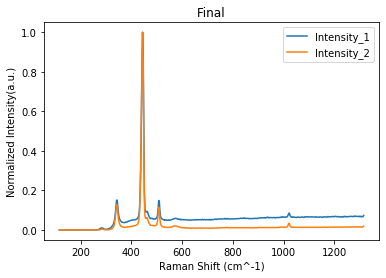

In [18]:
#Plotting Normalized w/out Rayleigh line in Wavenumber (cm^-1)
test='Intensity'
IntCols = [idx for idx in df if idx.lower().startswith(test.lower())]
#print(IntCols)
df.plot(x='Wavelength_1', y=IntCols)
plt.title('Final')
plt.xlabel('Raman Shift (cm^-1)')
plt.ylabel('Normalized Intensity(a.u.)')